In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()

env = os.environ

SOURCE2_DETECTION_DIR = env.get("SOURCE2_DETECTION_DIR")
SOURCE3_DETECTION_DIR = env.get("SOURCE3_DETECTION_DIR")

In [2]:
source2_test_annotations = os.path.join(SOURCE2_DETECTION_DIR, "test_annotations.json")
source2_train_annotations = os.path.join(SOURCE2_DETECTION_DIR, "train_annotations.json")
source2_validation_annotations = os.path.join(SOURCE2_DETECTION_DIR, "validation_annotations.json")

source3_test_annotations = os.path.join(SOURCE3_DETECTION_DIR, "test_annotations.json")
source3_train_annotations = os.path.join(SOURCE3_DETECTION_DIR, "train_annotations.json")
source3_validation_annotations = os.path.join(SOURCE3_DETECTION_DIR, "validation_annotations.json")

source2_test_dir = os.path.join(SOURCE2_DETECTION_DIR, "test/")
source2_train_dir = os.path.join(SOURCE2_DETECTION_DIR, "train/")
source2_validation_dir = os.path.join(SOURCE2_DETECTION_DIR, "validation/")

source3_test_dir = os.path.join(SOURCE3_DETECTION_DIR, "test/")
source3_train_dir = os.path.join(SOURCE3_DETECTION_DIR, "train/")
source3_validation_dir = os.path.join(SOURCE3_DETECTION_DIR, "validation/")

In [6]:
source2_test_contents = os.listdir(source2_test_dir)
source2_train_contents = os.listdir(source2_train_dir)
source2_validation_contents = os.listdir(source2_validation_dir)

source3_test_contents = os.listdir(source3_test_dir)
source3_train_contents = os.listdir(source3_train_dir)
source3_validation_contents = os.listdir(source3_validation_dir)

In [27]:
source2_img_heights = []
source2_img_widths = []

source3_img_heights = []
source3_img_widths = []

def get_images_sizes(filenames, src_dir,
                     heights_list, widths_list):
 
    for f in filenames:
        filename = os.path.join(src_dir ,f)
        w, h = Image.open(filename).size
        heights_list.append(h)
        widths_list.append(w)

get_images_sizes(source2_test_contents, source2_test_dir,
                 source2_img_heights, source2_img_widths)
get_images_sizes(source2_train_contents, source2_train_dir,
                 source2_img_heights, source2_img_widths)
get_images_sizes(source2_validation_contents, source2_validation_dir,
                 source2_img_heights, source2_img_widths)


get_images_sizes(source3_test_contents, source3_test_dir,
                 source3_img_heights, source3_img_widths)
get_images_sizes(source3_train_contents, source3_train_dir,
                 source3_img_heights, source3_img_widths)
get_images_sizes(source3_validation_contents, source3_validation_dir,
                 source3_img_heights, source3_img_widths)

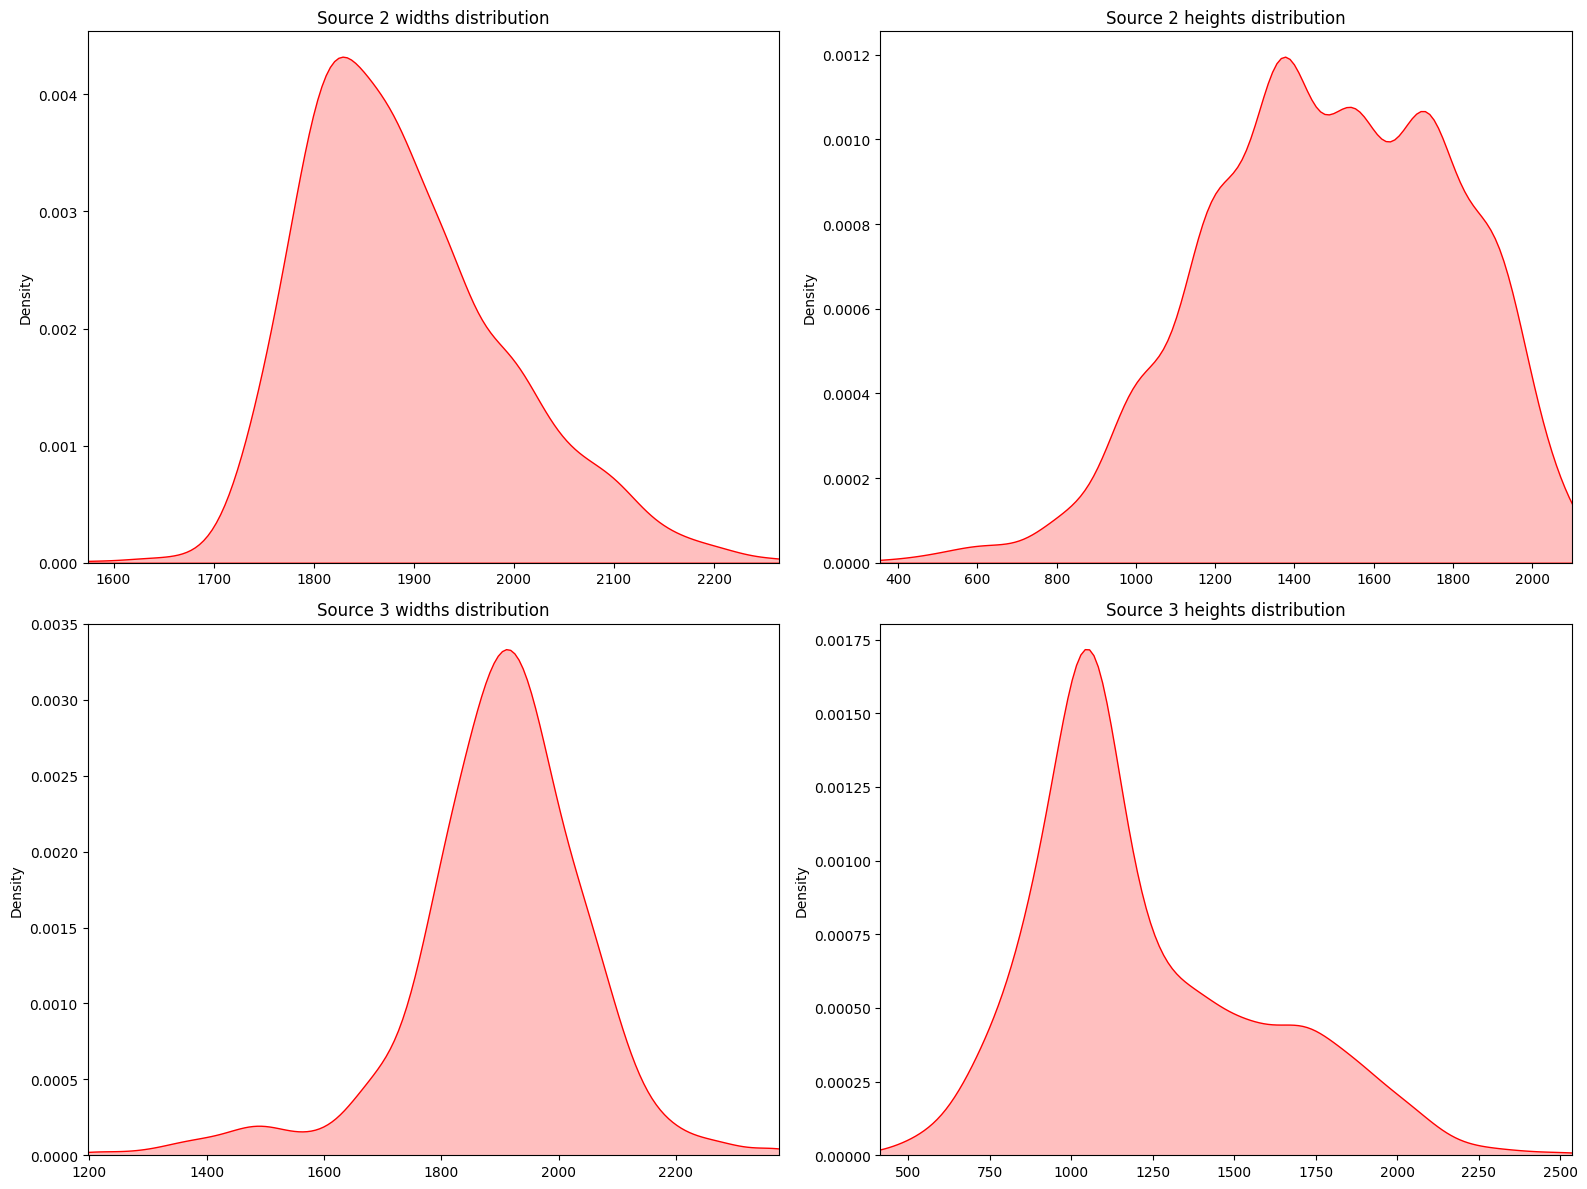

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 12))  
data = [source2_img_widths, source2_img_heights, source3_img_widths, source3_img_heights]

titles = ["Source 2 widths distribution", "Source 2 heights distribution",
          "Source 3 widths distribution", "Source 3 heights distribution"]

for i, ax in enumerate(axs.flatten()):
    sns.kdeplot(data[i], ax=ax, color='red', fill=True)
    ax.set_xlim([min(data[0]), max(data[2])])  
    ax.set_title(titles[i])

plt.tight_layout()

plt.show()


In [32]:
source2_mean_height = np.array(source2_img_heights).mean()
source2_mean_width = np.array(source2_img_widths).mean()

source3_mean_height = np.array(source3_img_heights).mean()
source3_mean_width = np.array(source3_img_widths).mean()

print(f"Source 2 mean height: {source2_mean_height}", f"Source 2 mean width: {source2_mean_width}")
print(f"Source 3 mean height: {source3_mean_height}", f"Source 3 mean width: {source3_mean_width}")
print((source2_mean_height + source3_mean_height) / 4, (source2_mean_width + source3_mean_width) / 4)

Source 2 mean height: 1487.1459549624687 Source 2 mean width: 1890.3544620517098
Source 3 mean height: 1222.9847094801223 Source 3 mean width: 1896.7074413863404
677.5326661106478 946.7654758595125
